In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive #toimport google drive data

In [0]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [0]:
#this changes the directory tothe drive

In [53]:

from google.colab import files
uploaded = files.upload()

Saving slr02.csv to slr02 (2).csv


In [54]:
columnname=['x','y']
dataset=pd.read_csv("slr02.csv",names=columnname)
print(dataset)
dataset.shape
cleaned_training_data = dataset.dropna()  # Cleaning the data by removing the rows with "NaN" values in them. dropna() does the job
x_train_new = cleaned_training_data.as_matrix(columns=['x'])
y_train_new = cleaned_training_data.as_matrix(columns=['y'])

# reshaping the data from (699,1) to (699)
x_train = x_train_new.reshape(x_train_new.size)
y_train = y_train_new.reshape(y_train_new.size)

            x          y
0   20.000000  88.599998
1   16.000000  71.599998
2   19.799999  93.300003
3   18.400000  84.300003
4   17.100000  80.599998
5   15.500000  75.199997
6   14.700000  69.699997
7   17.100000  82.000000
8   15.400000  69.400002
9   16.200001  83.300003
10  15.000000  79.599998
11  17.200001  82.599998
12  16.000000  80.599998
13  17.000000  83.500000
14  14.400000  76.300003


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [55]:
type(dataset)

pandas.core.frame.DataFrame

In [56]:
dataset.describe()

,x,y
count,15.000000,15.000000
mean,16.653333,80.040000
std,1.702044,6.707332
min,14.400000,69.400002
25%,15.450000,75.750000
50%,16.200001,80.599998
75%,17.150001,83.400002
max,20.000000,93.300003


In [57]:
x_value = dataset.iloc[0:dataset.shape[0],0:1]
x_value

,x
0,20.000000
1,16.000000
2,19.799999
3,18.400000
4,17.100000
5,15.500000
6,14.700000
7,17.100000
8,15.400000
9,16.200001


In [58]:
y_value = dataset.iloc[0:dataset.shape[0],1:2]
y_value

,y
0,88.599998
1,71.599998
2,93.300003
3,84.300003
4,80.599998
5,75.199997
6,69.699997
7,82.000000
8,69.400002
9,83.300003


In [59]:
print("Mean of x values is %f and median is %f\n" % (np.mean(x_value), np.median(x_value)))
print("Mean of y values is %f and median is %f\n" % (np.mean(y_value), np.median(y_value)))

Mean of x values is 16.653333 and median is 16.200001

Mean of y values is 80.040000 and median is 80.599998



Text(0.5, 1.0, 'enmployment Vs percentage of enemployment')

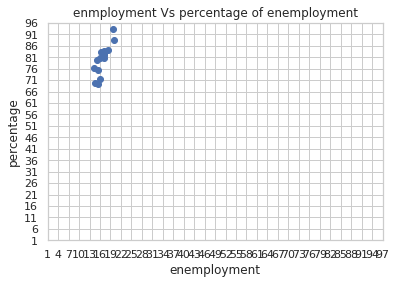

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(1,100,step=3))
plt.yticks(np.arange(1,100,step=5))
plt.xlabel("enemployment")
plt.ylabel("percentage")
plt.title("enmployment Vs percentage of enemployment")

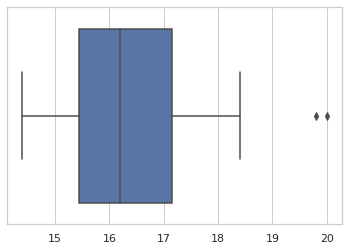

In [64]:
import seaborn as sns       #boxplot to see outliers data
sns.set(style="whitegrid")
ax = sns.boxplot(x_value)

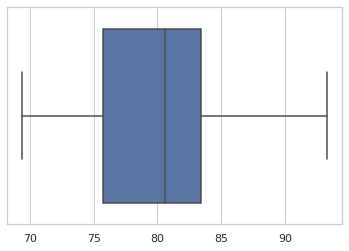

In [65]:
sns.set(style="whitegrid")
ay = sns.boxplot(y_value)

In [0]:
#define hypothesis
def hypothesis(theta_array, x):
    # Returns value of hypothesis at the point corresponding to the 'x' entry
    # H(x) = theta_0 + theta_1*x
    return theta_array[0] + theta_array[1]*x

In [0]:
#define cost function
def cost_function(theta_array, x_value, y_value, m):
    # This function returns our cost function value at particular theta values
    total_error = 0
    for i in range(m):
        total_error += (theta_array[0] + theta_array[1]*x_value[i] - y_value[i])**2
    return total_error/(2*m)

In [0]:
#initialize regularization parameters
# initializing values of thetas
    theta_0 = 0  # bias
    theta_1 = 0  # weight
    
    # defining a learning rate
    alpha = 0.00005

    # Setting the number of iterations
    iters = 500

In [0]:
#minimizing cost function error
def training(x_train, y_train, alpha, iters):
    # This is the function which takes care of the Regression

    # Finding size of the training data
    m = x_train.size
    print(m)
    # initializing values of thetas
    theta_0 = 0     # bias
    theta_1 = 0     # weight

    # creating a weight matrix which contains both theta_0 and theta_1
    theta_array = [theta_0, theta_1]

    # creating an array that stores the values of the cost function during each iteration
    cost_function_values = []

    for i in range(iters):
        # changing the values of theta 0 and theta 1 according to the gradient descent method
        theta_array = improvise_thetas(theta_array, x_train, y_train, alpha, m)

        # storing values of the cost function after every improvisation step (gradient descent step)
        cost_function_values.append(cost_function(theta_array, x_train, y_train, m))

        # print values every 10 iterations
        if i % 10 == 0:
            print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
            print('value of theta_1 at iteration %d is: ' % i, theta_array[1], '\n')
            ynew=x_train*theta_array[1]+theta_array[0]
            plt.plot(x_train,ynew,'r')
            plt.scatter(x_train,y_train)
            plt.show()

    # Plot our cost function's progress over our training period to check if the model has learnt
    x = np.arange(0, len(cost_function_values), step=1)
    plt.plot(x, cost_function_values, "-b", label="Cost Function Curve")
    plt.title("Learning Curve")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function Value")
    plt.legend()
    plt.show()
    print("Cost function values: ",cost_function_values)
    # By returning our theta_array and saving it we are basically saving our trained model
    return theta_array

In [0]:
#update the values of theta by gradient descent
def improvise_thetas(theta_array, X, Y, alpha, m):
    ''' This function updates the values of theta_0 and theta_1 and returns an array containing
            the updated theta values. This is where gradient descent takes place '''

    # initializing summations to zero
    summation_0 = 0
    summation_1 = 0

    for i in range(m):        # finding the value of summations and finally the value of
        summation_0 += (theta_array[0] + theta_array[1]*X[i]) - Y[i]

        summation_1 += X[i]*((theta_array[0] + theta_array[1]*X[i])-Y[i])

    new_theta_0 = theta_array[0] - alpha * (summation_0) / m

    new_theta_1 = theta_array[1] - alpha * (summation_1) / m

    updated_theta_array = [new_theta_0, new_theta_1]
    print(updated_theta_array)
    return updated_theta_array

15
[0.004001999994833332, 0.06709156667541333]
value of theta_0 at iteration 0 is:  0.004001999994833332
value of theta_1 at iteration 0 is:  0.06709156667541333 



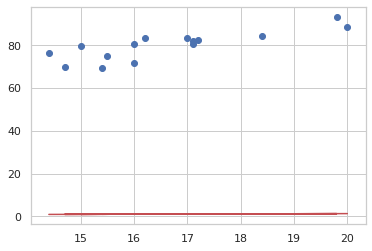

[0.007947934978439371, 0.1332403938467872]
[0.01183859274182964, 0.19845972831043862]
[0.015674750006460365, 0.26276263072684125]
[0.019457172579775077, 0.326161978236092]
[0.0231866155085616, 0.38867046703662655]
[0.026863823230154182, 0.4503006149277004]
[0.03048952972151102, 0.5110647638161446]
[0.034064458646197025, 0.570975082187898]
[0.03758932349930131, 0.6300435675448113]
[0.04106482775031834, 0.6882820488072097]
value of theta_0 at iteration 10 is:  0.04106482775031834
value of theta_1 at iteration 10 is:  0.6882820488072097 



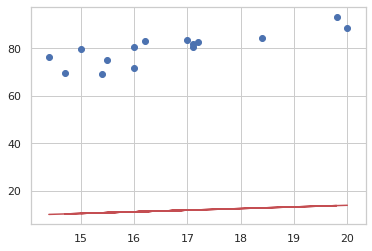

[0.04449166498402144, 0.7457021886826978]
[0.04787051903935684, 0.8023154860016782]
[0.051202064146386006, 0.8581332780200535]
[0.054486965061303835, 0.9131667426895712]
[0.05772587719955958, 0.9674269008962688]
[0.06091944676710727, 1.020924618667464]
[0.06406831088981188, 1.0736706093477346]
[0.06717309774103719, 1.1256754357443222]
[0.07023442666744077, 1.1769495122423907]
[0.0732529083130015, 1.2275031068905624]
value of theta_0 at iteration 20 is:  0.0732529083130015
value of theta_1 at iteration 20 is:  1.2275031068905624 



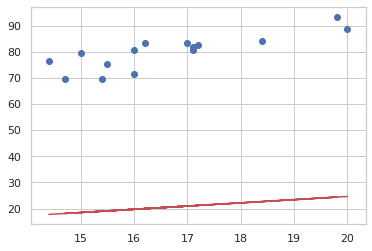

[0.07622914474130423, 1.2773463434571484]
[0.07916372955610619, 1.3264892034574873]
[0.08205724802020935, 1.374941528152797]
[0.08491027717266231, 1.4227130205209386]
[0.08772338594431552, 1.4698132471994896]
[0.09049713527175264, 1.516251640401514]
[0.0932320782096211, 1.562037499804413]
[0.09592876004138418, 1.607179994412234]
[0.09858771838851697, 1.6516881643918129]
[0.1012094833181679, 1.6955709228831153]
value of theta_0 at iteration 30 is:  0.1012094833181679
value of theta_1 at iteration 30 is:  1.6955709228831153 



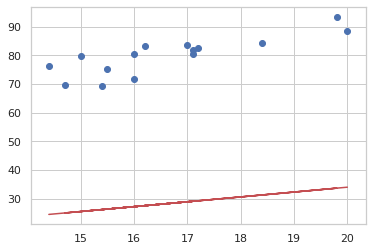

[0.10379457744930745, 1.73883705778414]
[0.10634351605738546, 1.7814952335107428]
[0.1088568071775177, 1.8235539927317304]
[0.11133495170622261, 1.8650217580795758]
[0.11377844350172853, 1.9059068338370957]
[0.11618776948287135, 1.9462174076004264]
[0.11856340972660265, 1.9859615519186335]
[0.12090583756412762, 2.025147225910283]
[0.12321551967569219, 2.0637822768572964]
[0.12549291618403818, 2.101874441776411]
value of theta_0 at iteration 40 is:  0.12549291618403818
value of theta_1 at iteration 40 is:  2.101874441776411 



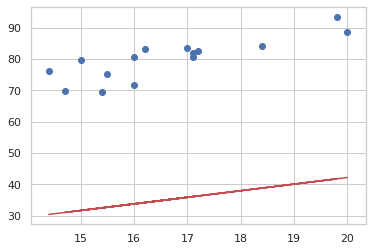

[0.1277384807465453, 2.139431348968558]
[0.12995266064607852, 2.1764605195464712]
[0.13213589688055877, 2.2129693689408287]
[0.13428862425127513, 2.2489652083852327]
[0.13641127144995613, 2.2844552463803227]
[0.13850426114461745, 2.3194465901373156]
[0.14056801006420355, 2.353946247001263]
[0.14260292908203978, 2.38796112585431]
[0.14460942329811194, 2.4214980384992324]
[0.14658789212018972, 2.4545637010235404]
value of theta_0 at iteration 50 is:  0.14658789212018972
value of theta_1 at iteration 50 is:  2.4545637010235404 



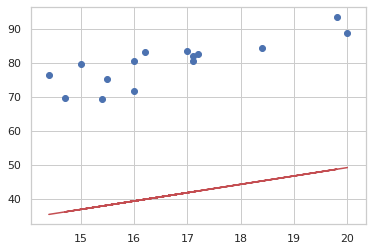

[0.1485387293438102, 2.4871647351444075]
[0.15046232323113756, 2.519307669534706]
[0.15235905658871454, 2.550998941130408]
[0.15422930684412156, 2.582244896419617]
[0.15607344612155855, 2.6130517927134838]
[0.15789184131636477, 2.643425799399267]
[0.15968485416849165, 2.6733729991757866]
[0.16145284133494306, 2.702899389271516]
[0.16319615446119773, 2.7320108826455574]
[0.1649151402516282, 2.7607133091717455]
value of theta_0 at iteration 60 is:  0.1649151402516282
value of theta_1 at iteration 60 is:  2.7607133091717455 



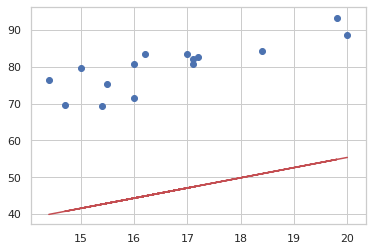

[0.16661014053893017, 2.7890124168061097]
[0.1682814923525763, 2.816913872737932]
[0.16992952798630817, 2.8444232645246332]
[0.1715545750646799, 2.8715461012107095]
[0.17315695660866656, 2.8982878144309483]
[0.17473699110035104, 2.9246537594981428]
[0.1762949925467016, 2.950649216475521]
[0.1778312705424536, 2.9762793912341055]
[0.17934613033210722, 3.001549416495218]
[0.18083987287105463, 3.0264643528583344]
value of theta_0 at iteration 70 is:  0.18083987287105463
value of theta_1 at iteration 70 is:  3.0264643528583344 



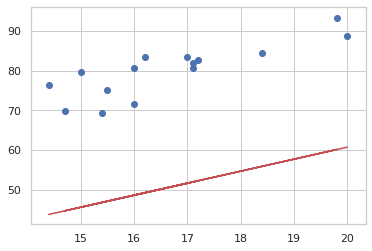

[0.18231279488584762, 3.051029189814495]
[0.18376518893361882, 3.0752488467454775]
[0.18519734346066774, 3.09912817390893]
[0.18660954286022377, 3.1226719534096588]
[0.1880020675293973, 3.145884900157273]
[0.1893751939253308, 3.1687716628103666]
[0.1907291946205609, 3.191336824707441]
[0.19206433835760228, 3.2135849047847405]
[0.19338089010276505, 3.2355203584811925]
[0.1946791110992154, 3.2571475786306348]
value of theta_0 at iteration 80 is:  0.1946791110992154
value of theta_1 at iteration 80 is:  3.2571475786306348 



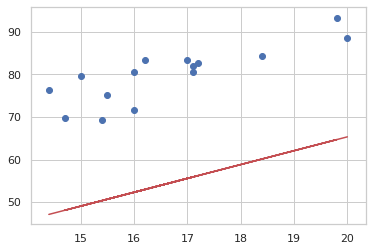

[0.19595925891929114, 3.278470896341503]
[0.1972215875160818, 3.2994945818641574]
[0.19846634727428408, 3.3202228454460245]
[0.19969378506034283, 3.3406598381747203]
[0.20090414427188724, 3.3608096528093276]
[0.20209766488647257, 3.380676324599994]
[0.2032745835096369, 3.4002638320960097]
[0.20443513342228264, 3.419576097942536]
[0.2055795446273923, 3.4386169896661336]
[0.20670804389608782, 3.4573903204492566]
value of theta_0 at iteration 90 is:  0.20670804389608782
value of theta_1 at iteration 90 is:  3.4573903204492566 



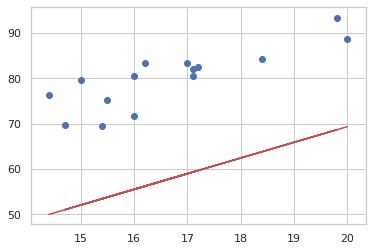

[0.20782085481304258, 3.475899849893862]
[0.20891819782125556, 3.494149284774289]
[0.21000029026619615, 3.512142279779563]
[0.2110673464393287, 3.529882438245262]
[0.2121195776210256, 3.5473733128751084]
[0.2131571921228772, 3.564618406452414]
[0.2141803953294074, 3.581621172541531]
[0.215189389739203, 3.598385016179448]
[0.216184375005465, 3.614913294557665]
[0.21716554797599028, 3.63120931769449]
value of theta_0 at iteration 100 is:  0.21716554797599028
value of theta_1 at iteration 100 is:  3.63120931769449 



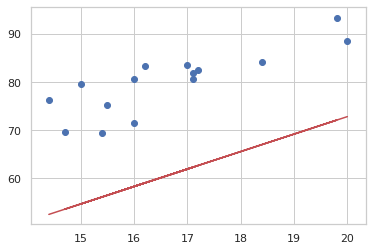

[0.21813310273259143, 3.6472763490978872]
[0.2190872306299627, 3.6631176064190125]
[0.22002812033399965, 3.678736262096564]
[0.2209559578595807, 3.6941354439920797]
[0.22187092660781735, 3.70931823601631]
[0.22277320740278148, 3.7242876787467867]
[0.22366297852771613, 3.7390467700367123]
[0.22454041576073777, 3.753598465615299]
[0.22540569241003677, 3.767945679679668]
[0.2262589793485833, 3.7820912854784337]
value of theta_0 at iteration 110 is:  0.2262589793485833
value of theta_1 at iteration 110 is:  3.7820912854784337 



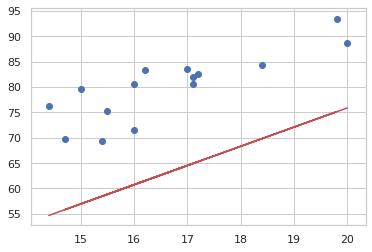

[0.2271004450483455, 3.7960381158870846]
[0.22793025561402694, 3.809788963975284]
[0.22874857481632996, 3.8233465835661975]
[0.22955556412475156, 3.8367136897879575]
[0.23035138273991862, 3.849892959617385]
[0.23113618762546861, 3.862887032416068]
[0.2319101335394824, 3.8756985104589052]
[0.23267337306547536, 3.888329959455229]
[0.2334260566429531, 3.9007839090626]
[0.23416833259753767, 3.9130628533933844]
value of theta_0 at iteration 120 is:  0.23416833259753767
value of theta_1 at iteration 120 is:  3.9130628533933844 



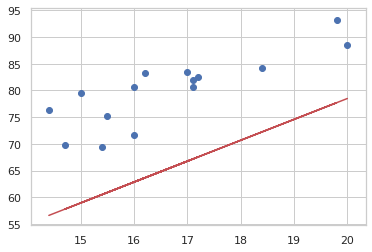

[0.23490034717067063, 3.9251692515142147]
[0.23562224454889866, 3.937105527938429]
[0.23633416689274764, 3.9488740731115937]
[0.23703625436519113, 3.9604772438902036]
[0.23772864515971867, 3.971917364013653]
[0.23841147552800976, 3.983196724569578]
[0.23908487980721907, 3.9943175844526597]
[0.23974899044687806, 4.005282170816978]
[0.24040393803541876, 4.016092679522012]
[0.2410498513263248, 4.026751275572374]
value of theta_0 at iteration 130 is:  0.2410498513263248
value of theta_1 at iteration 130 is:  4.026751275572374 



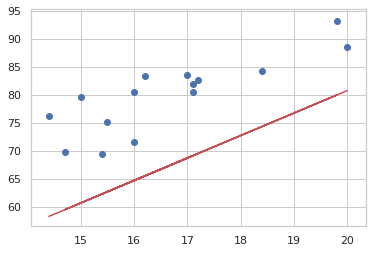

[0.24168685726391495, 4.037260093551359]
[0.2423150810087644, 4.047621238048412]
[0.2429346459627688, 4.0578367840805765]
[0.24354567379385628, 4.067908777508036]
[0.2441482844603519, 4.077839235443799]
[0.24474259623500003, 4.087630146657644]
[0.24532872572864917, 4.097283471974378]
[0.2459067879136038, 4.106801144666502]
[0.24647689614664817, 4.116185070841359]
[0.24703916219174668, 4.125437129822845]
value of theta_0 at iteration 140 is:  0.24703916219174668
value of theta_1 at iteration 140 is:  4.125437129822845 



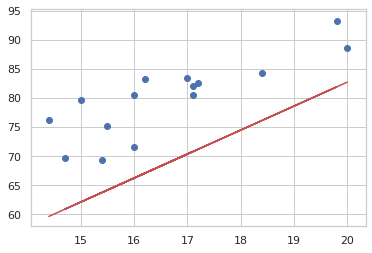

[0.24759369624242517, 4.134559174527749]
[0.24814060694383772, 4.143553031836812]
[0.24868000141452348, 4.152420502960571]
[0.24921198526785773, 4.161163363800057]
[0.24973666263320143, 4.169783365302431]
[0.25025413617675374, 4.178282233811621]
[0.2507645071221115, 4.186661671414031]
[0.2512678752705398, 4.194923356279393]
[0.2517643390209575, 4.203068942996826]
[0.2522539953896425, 4.211100062906183]
value of theta_0 at iteration 150 is:  0.2522539953896425
value of theta_1 at iteration 150 is:  4.211100062906183 



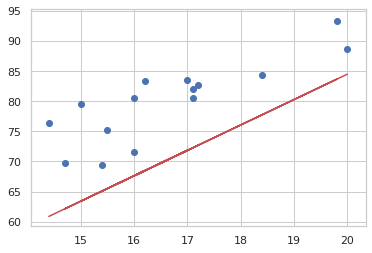

[0.2527369400296594, 4.21901832442473]
[0.25321326725001486, 4.226825313369241]
[0.25368307003454327, 4.234522593273567]
[0.2541464400605272, 4.242111705701745]
[0.25460346771705655, 4.249594170556697]
[0.2550542421231291, 4.2569714863846055]
[0.2554988511454973, 4.264245130675002]
[0.25593738141626393, 4.271416560156643]
[0.25636991835023076, 4.278487211089227]
[0.25679654616200326, 4.285458499551015]
value of theta_0 at iteration 160 is:  0.25679654616200326
value of theta_1 at iteration 160 is:  4.285458499551015 



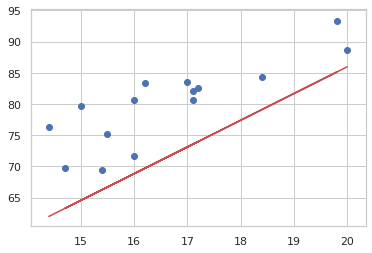

[0.2572173478828549, 4.292331821722404]
[0.25763240537735477, 4.299108554165524]
[0.2580417993597613, 4.305790054099898]
[0.2584456094101858, 4.312377659674236]
[0.2588439139905287, 4.318872690234403]
[0.25923679046019205, 4.325276446587627]
[0.2596243150915711, 4.331590211262992]
[0.26000656308532816, 4.337815248768271]
[0.26038360858545223, 4.34395280584315]
[0.2607555246941064, 4.3500041117088974]
value of theta_0 at iteration 170 is:  0.2607555246941064
value of theta_1 at iteration 170 is:  4.3500041117088974 



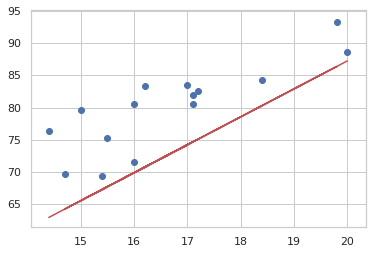

[0.2611223834862671, 4.355970378314517]
[0.2614842560241574, 4.361852800579451]
[0.2618412123714779, 4.367652556632866]
[0.26219332160743686, 4.373370808049584]
[0.26254065184058406, 4.37900870008269]
[0.2628832702224498, 4.384567361892876]
[0.2632212429609923, 4.390047906774563]
[0.26355463533385626, 4.395451432378841]
[0.263883511701445, 4.400779020933281]
[0.264207935519809, 4.406031739458659]
value of theta_0 at iteration 180 is:  0.264207935519809
value of theta_1 at iteration 180 is:  4.406031739458659 



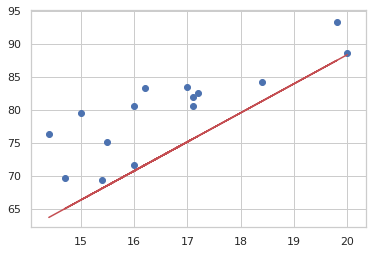

[0.26452796935335327, 4.41121063998263]
[0.2648436748873663, 4.416316759750402]
[0.2651551129403728, 4.421351121432451]
[0.26546234347631287, 4.426314733329316]
[0.2657654256165502, 4.431208589573516]
[0.2660644176517114, 4.436033670328631]
[0.26635937705335905, 4.4407909419855836]
[0.26665036048550056, 4.445481357356166]
[0.2669374238159356, 4.450105855863844]
[0.2672206221274438, 4.454665363731882]
value of theta_0 at iteration 190 is:  0.2672206221274438
value of theta_1 at iteration 190 is:  4.454665363731882 



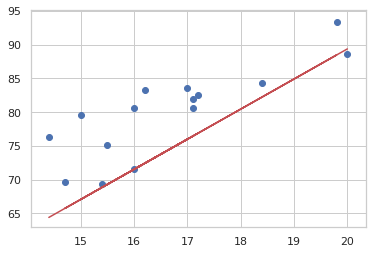

[0.2675000097288154, 4.459160794168825]
[0.2677756401657269, 4.46359304755137]
[0.2680475662314639, 4.467963011604677]
[0.26831583997749314, 4.472271561580136]
[0.2685805127238861, 4.476519560430642]
[0.2688416350695962, 4.480707858983407]
[0.2690992569025914, 4.48483729611034]
[0.26935342740984464, 4.488908698896039]
[0.26960419508718375, 4.492922882803417]
[0.2698516077490029, 4.496880651837003]
value of theta_0 at iteration 200 is:  0.2698516077490029
value of theta_1 at iteration 200 is:  4.496880651837003 



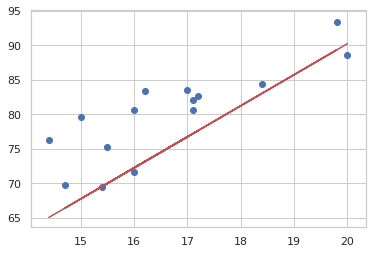

[0.2700957125378378, 4.5007827987039475]
[0.2703365559338063, 4.504630104972769]
[0.270574183763916, 4.5084233412298635]
[0.27080864121124176, 4.512163267233822]
[0.27103997282397346, 4.515850632067573]
[0.2712682225243373, 4.519486174288392]
[0.27149343361739126, 4.523070622075804]
[0.27171564879969734, 4.526604693377399]
[0.2719349101678716, 4.530089096052611]
[0.27215125922701433, 4.533524528014467]
value of theta_0 at iteration 210 is:  0.27215125922701433
value of theta_1 at iteration 210 is:  4.533524528014467 



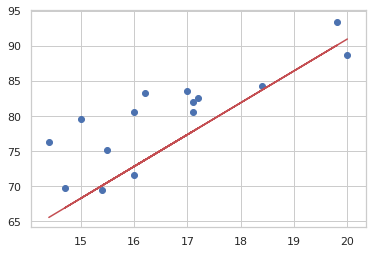

[0.2723647368990217, 4.53691167736935]
[0.2725753835307805, 4.540251222554794]
[0.2727832389022478, 4.543543832475345]
[0.2729883422344173, 4.546790166636516]
[0.27319073219717327, 4.54999087527685]
[0.27339044691703457, 4.553146599498141]
[0.2735875239847896, 4.55625797139381]
[0.27378200046302414, 4.559325614175496]
[0.2739739128935433, 4.562350142297844]
[0.27416329730468914, 4.565332161581565]
value of theta_0 at iteration 220 is:  0.27416329730468914
value of theta_1 at iteration 220 is:  4.565332161581565 



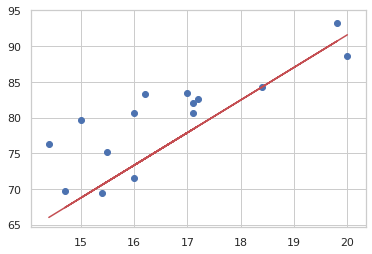

[0.2743501892185556, 4.568272269334747]
[0.274534623658102, 4.571171054472472]
[0.2747166351541666, 4.574029097634751]
[0.27489625775238147, 4.576846971302796]
[0.2750735250199904, 4.579625239913666]
[0.27524847005257086, 4.582364459973296]
[0.2754211254806616, 4.585065180167942]
[0.2755915234762972, 4.587727941474059]
[0.2757596957594504, 4.590353277266632]
[0.2759256736043845, 4.592941713425989]
value of theta_0 at iteration 230 is:  0.2759256736043845
value of theta_1 at iteration 230 is:  4.592941713425989 



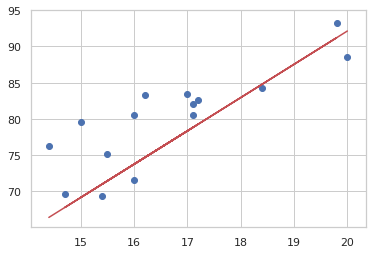

[0.2760894878459161, 4.59549376844311]
[0.2762511688855897, 4.5980099535234595]
[0.27641074669776616, 4.600490772689355]
[0.276568250835625, 4.602936722880903]
[0.2767237104370825, 4.605348294055514]
[0.27687715423062703, 4.607725969286018]
[0.2770286105410718, 4.6100702248574]
[0.2771781072952271, 4.612381530362183]
[0.2773256720274929, 4.614660348794463]
[0.27747133188537276, 4.61690713664263]
value of theta_0 at iteration 240 is:  0.27747133188537276
value of theta_1 at iteration 240 is:  4.61690713664263 



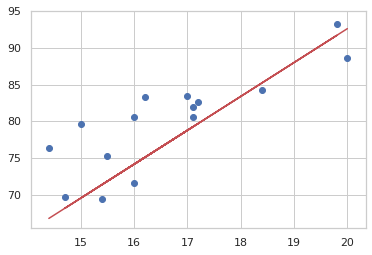

[0.27761511363491004, 4.619122343980776]
[0.2777570436660482, 4.621306414558832]
[0.27789714799791543, 4.623459785891425]
[0.2780354522840351, 4.625582889345496]
[0.278171981817463, 4.627676150226684]
[0.2783067615358525, 4.629739987864491]
[0.27843981602644835, 4.6317748156962635]
[0.27857116953101047, 4.633781041349976]
[0.27870084595066846, 4.635759066725867]
[0.2788288688507079, 4.63770928807692]
value of theta_0 at iteration 250 is:  0.2788288688507079
value of theta_1 at iteration 250 is:  4.63770928807692 



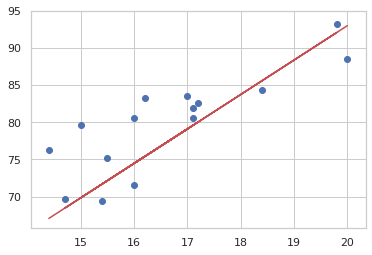

[0.27895526146528943, 4.6396320960882145]
[0.2790800467021016, 4.641527875955164]
[0.2792032471469482, 4.643397007460652]
[0.27932488506827113, 4.645239865051086]
[0.27944498242160987, 4.647056817911383]
[0.2795635608539981, 4.648848230038901]
[0.2796806417082987, 4.650614460316329]
[0.2797962460274778, 4.652355862583559]
[0.2799103945588187, 4.654072785708542]
[0.28002310775807654, 4.655765573657149]
value of theta_0 at iteration 260 is:  0.28002310775807654
value of theta_1 at iteration 260 is:  4.655765573657149 



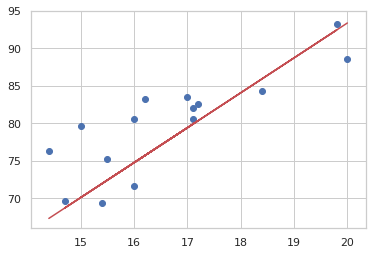

[0.2801344057935748, 4.657434565562056]
[0.28024430855024407, 4.659080095790654]
[0.28035283563360414, 4.660702494012008]
[0.28046000637369, 4.662302085262877]
[0.28056583982892297, 4.663879190012804]
[0.2806703547899271, 4.665434124228289]
[0.28077356978329204, 4.666967199436066]
[0.28087550307528336, 4.668478722785487]
[0.2809761726755002, 4.669968997110029]
[0.2810755963404818, 4.6714383209879395]
value of theta_0 at iteration 270 is:  0.2810755963404818
value of theta_1 at iteration 270 is:  4.6714383209879395 



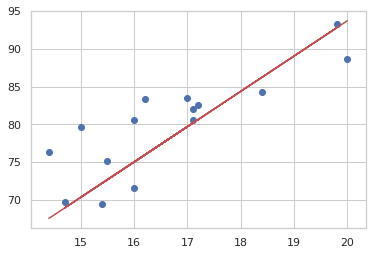

[0.2811737915772636, 4.672886988802028]
[0.28127077564688274, 4.674315290798617]
[0.281366565567835, 4.675723513145667]
[0.2814611781194827, 4.677111937990081]
[0.2815546298454148, 4.678480843514208]
[0.28164693705675997, 4.67983050399155]
[0.28173811583545294, 4.681161189841684]
[0.2818281820374549, 4.682473167684421]
[0.2819171512959289, 4.68376670039319]
[0.28200503902437035, 4.685042047147687]
value of theta_0 at iteration 280 is:  0.28200503902437035
value of theta_1 at iteration 280 is:  4.685042047147687 



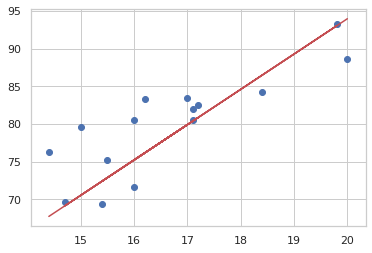

[0.28209186041969364, 4.686299463485772]
[0.2821776304652755, 4.687539201354647]
[0.2822623639339555, 4.688761509161304]
[0.28234607539099427, 4.689966631822273]
[0.2824287791969904, 4.691154810812669]
[0.28251048951075614, 4.692326284214545]
[0.28259122029215283, 4.693481286764572]
[0.2826709853048864, 4.694620049901046]
[0.2827497981192636, 4.695742801810235]
[0.28282767211490967, 4.696849767472071]
value of theta_0 at iteration 290 is:  0.28282767211490967
value of theta_1 at iteration 290 is:  4.696849767472071 



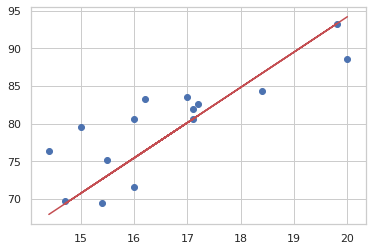

[0.2829046204834475, 4.697941168705208]
[0.28298065623113944, 4.699017224211442]
[0.2830557921814918, 4.700078149619503]
[0.28313004097782285, 4.701124157528239]
[0.2832034150857947, 4.702155457549193]
[0.2832759267959098, 4.703172256348569]
[0.2833475882259717, 4.704174757688632]
[0.28341841132351236, 4.705163162468499]
[0.28348840786818413, 4.706137668764378]
[0.283557589474119, 4.707098471869232]
value of theta_0 at iteration 300 is:  0.283557589474119
value of theta_1 at iteration 300 is:  4.707098471869232 



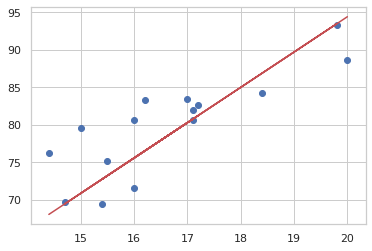

[0.2836259675922544, 4.708045764331888]
[0.283693553512626, 4.708979735995594]
[0.283760358366629, 4.709900574036037]
[0.28382639312924707, 4.710808462998827]
[0.2838916686212501, 4.711703584836453]
[0.28395619551136114, 4.712586118944718]
[0.284019984318393, 4.713456242198667]
[0.28408304541335444, 4.714314128988005]
[0.28414538902152736, 4.715159951252018]
[0.2842070252245142, 4.71599387851401]
value of theta_0 at iteration 310 is:  0.2842070252245142
value of theta_1 at iteration 310 is:  4.71599387851401 



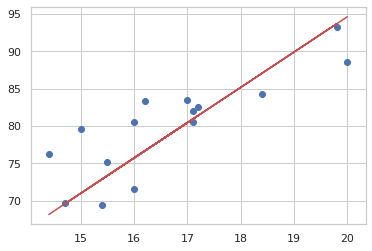

[0.28426796396225684, 4.716816077915246]
[0.2843282150350273, 4.717626714248425]
[0.2843877881053902, 4.718425949990679]
[0.2844466927001377, 4.719213945336113]
[0.28450493821219736, 4.719990858227883]
[0.284562533902513, 4.720756844389822]
[0.2846194889018995, 4.72151205735763]
[0.28467581221287097, 4.722256648509617]
[0.28473151271144387, 4.722990767097019]
[0.2847865991489143, 4.723714560273883]
value of theta_0 at iteration 320 is:  0.2847865991489143
value of theta_1 at iteration 320 is:  4.723714560273883 



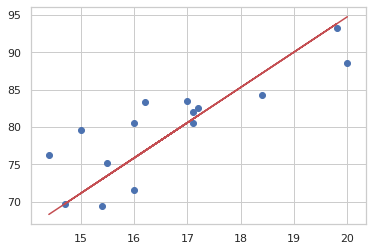

[0.2848410801536104, 4.7244281731265385]
[0.28489496423262056, 4.725131748702653]
[0.2849482597734966, 4.725825428039873]
[0.2850009750459337, 4.726509350194074]
[0.2850531182034263, 4.7271836522672]
[0.2851046972849011, 4.727848469434727]
[0.28515572021632657, 4.728503934972725]
[0.2852061948123004, 4.729150180284551]
[0.2852561287776144, 4.729787334927163]
[0.2853055297087973, 4.730415526637066]
value of theta_0 at iteration 330 is:  0.2853055297087973
value of theta_1 at iteration 330 is:  4.730415526637066 



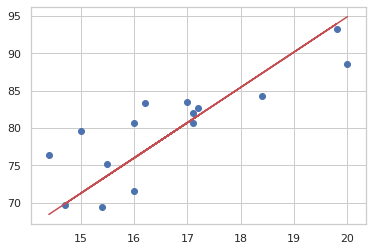

[0.28535440509563614, 4.731034881355888]
[0.28540276232267603, 4.731645523255603]
[0.28545060867069905, 4.732247574763396]
[0.2854979513181821, 4.732841156586183]
[0.28554479734273464, 4.733426387734778]
[0.2855911537225158, 4.73400338554773]
[0.2856370273376321, 4.734572265714817]
[0.28568242497151475, 4.735133142300216]
[0.2857273533122786, 4.735686127765346]
[0.2857718189540611, 4.736231332991384]
value of theta_0 at iteration 340 is:  0.2857718189540611
value of theta_1 at iteration 340 is:  4.736231332991384 



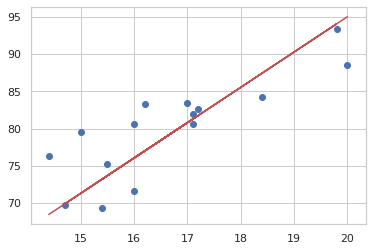

[0.28581582839834296, 4.736768867301476]
[0.2858593880552501, 4.737298838482623]
[0.28590250424483715, 4.737821352807273]
[0.28594518319835344, 4.738336515054596]
[0.2859874310594904, 4.73884442853147]
[0.2860292538856123, 4.73934519509317]
[0.28607065764896883, 4.739838915163761]
[0.2861116482378915, 4.740325687756212]
[0.28615223145797236, 4.740805610492223]
[0.2861924130332271, 4.741278779621772]
value of theta_0 at iteration 350 is:  0.2861924130332271
value of theta_1 at iteration 350 is:  4.741278779621772 



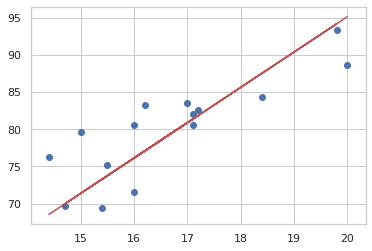

[0.2862321986072409, 4.741745290042393]
[0.28627159374429884, 4.742205235318177]
[0.28631060393049995, 4.742658707698511]
[0.2863492345748561, 4.7431057981365505]
[0.28638749101037503, 4.743546596307432]
[0.2864253784951283, 4.743981190626233]
[0.2864629022133042, 4.744409668265676]
[0.2865000672762462, 4.744832115173586]
[0.28653687872347616, 4.745248616090102]
[0.2865733415237036, 4.745659254564647]
value of theta_0 at iteration 360 is:  0.2865733415237036
value of theta_1 at iteration 360 is:  4.745659254564647 



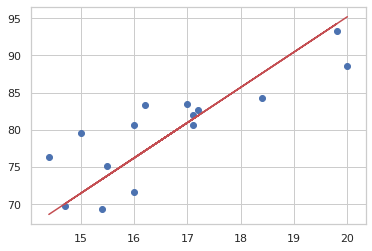

[0.28660946057582104, 4.746064112972659]
[0.2866452407098845, 4.746463272532087]
[0.2866806866880812, 4.746856813319654]
[0.28671580320568296, 4.747244814286894]
[0.2867505948919865, 4.747627353275966]
[0.2867850663112406, 4.748004507035235]
[0.28681922196355997, 4.748376351234646]
[0.2868530662858264, 4.748742960480878]
[0.2868866036525775, 4.749104408332281]
[0.28691983837688245, 4.749460767313608]
value of theta_0 at iteration 370 is:  0.28691983837688245
value of theta_1 at iteration 370 is:  4.749460767313608 



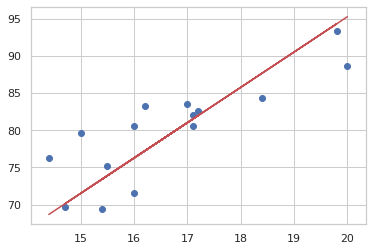

[0.28695277471120584, 4.749812108930541]
[0.28698541684825923, 4.750158503684007]
[0.28701776892184083, 4.750500021084296]
[0.28704983500766323, 4.750836729664983]
[0.28708161912416963, 4.751168696996652]
[0.2871131252333385, 4.751495989700427]
[0.28714435724147697, 4.75181867346131]
[0.2871753190000033, 4.752136813041341]
[0.2872060143062179, 4.752450472292562]
[0.28723644690406375, 4.752759714169805]
value of theta_0 at iteration 380 is:  0.28723644690406375
value of theta_1 at iteration 380 is:  4.752759714169805 



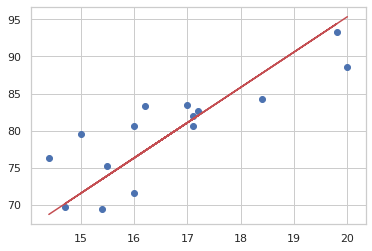

[0.2872666204848764, 4.7530646007433015]
[0.28729653868812294, 4.753365193211108]
[0.28732620510213097, 4.753661551911364]
[0.287355623264807, 4.753953736334375]
[0.2873847966643452, 4.754241805134525]
[0.2874137287399256, 4.7545258161420225]
[0.2874424228824031, 4.754805826374483]
[0.2874708824349865, 4.755081892048342]
[0.2874991106939076, 4.755354068590121]
[0.2875271109090818, 4.755622410647517]
value of theta_0 at iteration 390 is:  0.2875271109090818
value of theta_1 at iteration 390 is:  4.755622410647517 



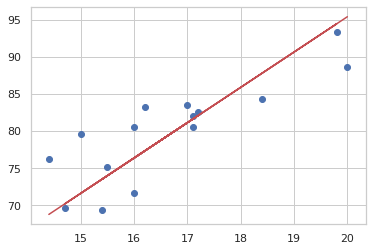

[0.2875548862847586, 4.755886972100354]
[0.2875824399801634, 4.756147806071371]
[0.2876097751101301, 4.756404964936856]
[0.2876368947457248, 4.756658500337138]
[0.2876638019148609, 4.75690846318693]
[0.2876904996029055, 4.757154903685521]
[0.287716990753277, 4.757397871326831]
[0.28774327826803486, 4.757637414909322]
[0.28776936500846045, 4.757873582545769]
[0.28779525379563026, 4.758106421672896]
value of theta_0 at iteration 400 is:  0.28779525379563026
value of theta_1 at iteration 400 is:  4.758106421672896 



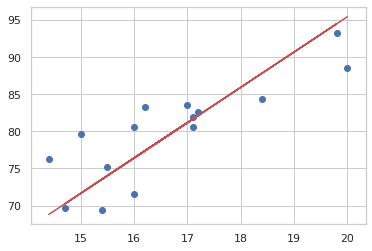

[0.2878209474109807, 4.7583359790608775]
[0.28784644859686515, 4.7585623008227]
[0.2878717600571032, 4.758785432423398]
[0.2878968844575219, 4.759005418689162]
[0.2879218244264898, 4.759222303816309]
[0.28794658255544325, 4.7594361313801405]
[0.2879711613994053, 4.759646944343662]
[0.28799556347749744, 4.759854785066189]
[0.2880197912734439, 4.760059695311831]
[0.2880438472360692, 4.760261716257854]
value of theta_0 at iteration 410 is:  0.2880438472360692
value of theta_1 at iteration 410 is:  4.760261716257854 



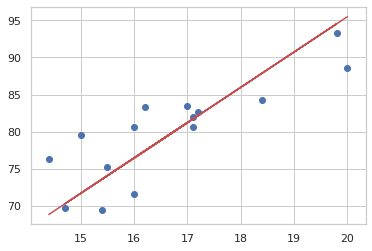

[0.2880677337797885, 4.760460888502926]
[0.2880914532850911, 4.760657252075246]
[0.28811500809901713, 4.760850846440564]
[0.28813840053562745, 4.761041710510081]
[0.2881616328764673, 4.761229882648239]
[0.2881847073710229, 4.76141540068041]
[0.2882076262371723, 4.761598301900466]
[0.28823039166162895, 4.761778623078246]
[0.28825300580038027, 4.761956400466925]
[0.28827547077911886, 4.76213166981027]
value of theta_0 at iteration 420 is:  0.28827547077911886
value of theta_1 at iteration 420 is:  4.76213166981027 



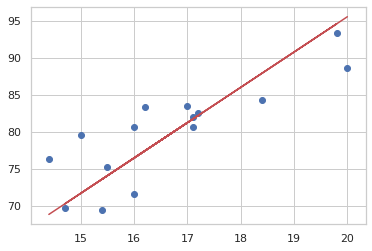

[0.2882977886936685, 4.762304466349796]
[0.2883199616104038, 4.76247482483183]
[0.28834199156666374, 4.762642779514461]
[0.28836388057116, 4.762808364174407]
[0.2883856306043791, 4.762971612113776]
[0.28840724361897896, 4.763132556166734]
[0.28842872154017984, 4.763291228706082]
[0.28845006626615016, 4.76344766164974]
[0.2884712796683863, 4.763601886467134]
[0.28849236359208763, 4.763753934185503]
value of theta_0 at iteration 430 is:  0.28849236359208763
value of theta_1 at iteration 430 is:  4.763753934185503 



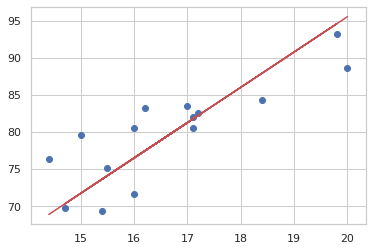

[0.28851331985652584, 4.76390383539611]
[0.2885341502554094, 4.764051620260367]
[0.2885548565572426, 4.764197318515879]
[0.28857544050567985, 4.764340959482394]
[0.2885959038198748, 4.764482572067678]
[0.2886162481948246, 4.764622184773303]
[0.2886364753017094, 4.764759825700353]
[0.2886565867882268, 4.764895522555055]
[0.2886765842789221, 4.765029302654325]
[0.28869646937551346, 4.765161192931236]
value of theta_0 at iteration 440 is:  0.28869646937551346
value of theta_1 at iteration 440 is:  4.765161192931236 



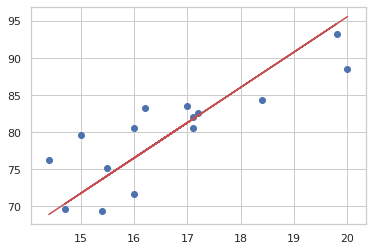

[0.28871624365721266, 4.7652912199404165]
[0.2887359086810414, 4.765419409863363]
[0.288755465982143, 4.765545788513689]
[0.28877491707409003, 4.765670381342289]
[0.28879426344918707, 4.765793213442438]
[0.28881350657876986, 4.765914309554815]
[0.2888326479134999, 4.766033694072458]
[0.2888516888836547, 4.76615139104565]
[0.2888706308994146, 4.766267424186733]
[0.28888947535114484, 4.766381816874858]
value of theta_0 at iteration 450 is:  0.28888947535114484
value of theta_1 at iteration 450 is:  4.766381816874858 



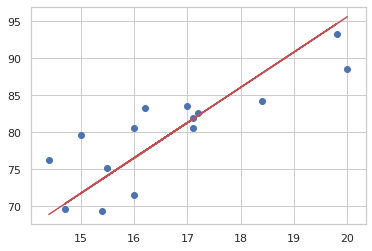

[0.2889082236096741, 4.766494592160669]
[0.28892687702656905, 4.766605772770912]
[0.28894543693440494, 4.766715381112996]
[0.28896390464703253, 4.766823439279469]
[0.2889822814598412, 4.766929969052454]
[0.2890005686500181, 4.767034991907999]
[0.28901876747680444, 4.767138529020389]
[0.2890368791817471, 4.767240601266379]
[0.2890549049889476, 4.767341229229375]
[0.28907284610530715, 4.76744043320356]
value of theta_0 at iteration 460 is:  0.28907284610530715
value of theta_1 at iteration 460 is:  4.76744043320356 



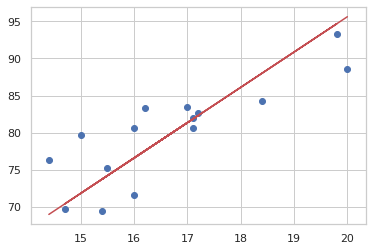

[0.28909070372076834, 4.767538233197954]
[0.28910847900855335, 4.767634648940425]
[0.289126173125399, 4.767729699881634]
[0.2891437872117884, 4.767823405198934]
[0.28916132239217923, 4.767915783800212]
[0.289178779775229, 4.76800685432767]
[0.28919616045401697, 4.768096635161563]
[0.28921346550626326, 4.768185144423878]
[0.2892306959945445, 4.768272399981962]
[0.2892478529665065, 4.768358419452101]
value of theta_0 at iteration 470 is:  0.2892478529665065
value of theta_1 at iteration 470 is:  4.768358419452101 



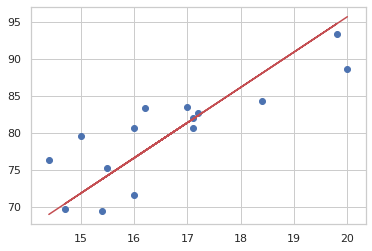

[0.2892649374550744, 4.768443220203048]
[0.28928195047865923, 4.768526819359502]
[0.2892988930413619, 4.768609233805535]
[0.28931576613317433, 4.768690480187974]
[0.28933257073017765, 4.7687705749197375]
[0.2893493077947378, 4.768849534183117]
[0.28936597827569793, 4.768927373933021]
[0.28938258310856896, 4.769004109900171]
[0.28939912321571626, 4.769079757594249]
[0.2894155995065449, 4.769154332307004]
value of theta_0 at iteration 480 is:  0.2894155995065449
value of theta_1 at iteration 480 is:  4.769154332307004 



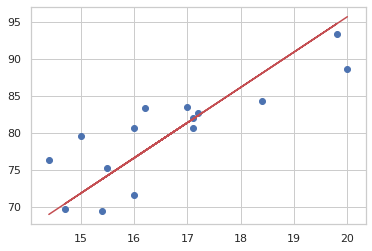

[0.28943201287768144, 4.769227849115314]
[0.2894483642131537, 4.769300322884209]
[0.28946465438456753, 4.769371768269841]
[0.28948088425128166, 4.769442199722426]
[0.28949705466057957, 4.769511631489133]
[0.28951316644783925, 4.769580077616937]
[0.28952922043670043, 4.769647551955438]
[0.28954521743922956, 4.769714068159625]
[0.28956115825608253, 4.769779639692618]
[0.2895770436766648, 4.7698442798283605]
value of theta_0 at iteration 490 is:  0.2895770436766648
value of theta_1 at iteration 490 is:  4.7698442798283605 



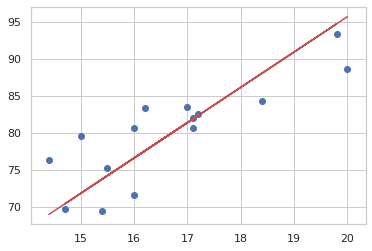

[0.28959287447928966, 4.76990800165428]
[0.28960865143133396, 4.769970818073907]
[0.2896243752893919, 4.770032741809459]
[0.2896400467994264, 4.770093785404389]
[0.28965566669691867, 4.770153961225897]
[0.2896712357070153, 4.770213281467407]
[0.28968675454467363, 4.770271758151008]
[0.2897022239148048, 4.770329403129862]
[0.28971764451241505, 4.770386228090579]


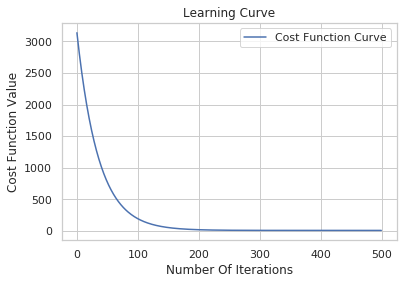

Cost function values:  [3134.484186152209, 3047.2764610993177, 2962.502296294963, 2880.0937824378047, 2799.984905257957, 2722.1114926355062, 2646.411163194709, 2572.823276332687, 2501.288883642584, 2431.7506816922782, 2364.1529661208206, 2298.4415870158264, 2234.5639055360734, 2172.468751744567, 2112.106383618278, 2053.428447201736, 1996.3879378725453, 1940.9391626878012, 1887.0377037812393, 1834.6403827818046, 1783.7052262251239, 1734.1914319301934, 1686.0593363143248, 1639.2703826201873, 1593.7870900294788, 1549.5730236384945, 1506.5927652715322, 1464.8118851087652, 1424.1969141058435, 1384.7153171831387, 1346.3354671631491, 1309.0266194351918, 1272.7588873270847, 1237.5032181640913, 1203.231369995943, 1169.9158889733096, 1137.53008735558, 1106.0480221323471, 1075.4444742414646, 1045.6949283670335, 1016.7755533011308, 988.6631828535487, 961.3352972942586, 934.770005313725, 908.9460264866252, 883.8426742249236, 859.4398392066464, 835.7179732670807, 812.6580737394976, 790.2416682328507

In [71]:
    # training time!
theta_array = training(x_train, y_train, alpha, iters)

print("\n*** The final value of theta_0 is ",theta_array[0]," and theta_1 is ",theta_array[1]," ***\n")


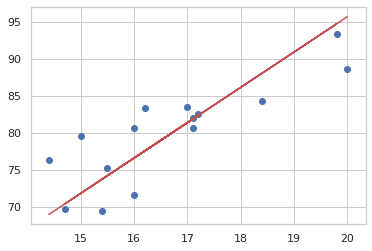

In [72]:
ynew=x_train*theta_array[1]+theta_array[0]
plt.plot(x_train,ynew,'r')
plt.scatter(x_train,y_train)

In [73]:
predict=hypothesis(theta_array,20)     #making predictions using the optimized Θ values for a 1650 square feet house with 3 bedrooms
predict

95.697442206324